In [66]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

query = "https://github.com/learningmachineslab/pathways_database/blob/master/sql/gradeinflation.sql"

In [67]:
df = pd.read_csv('data/gradeinflation.csv')
df['dt'] = pd.to_datetime(df['dt'])
df.set_index('dt', inplace=True)

In [70]:
df.columns
avgs = ['phys1_avg', 'phys2_avg', 'calc1_avg', 'calc2_avg', 'phys215_avg']

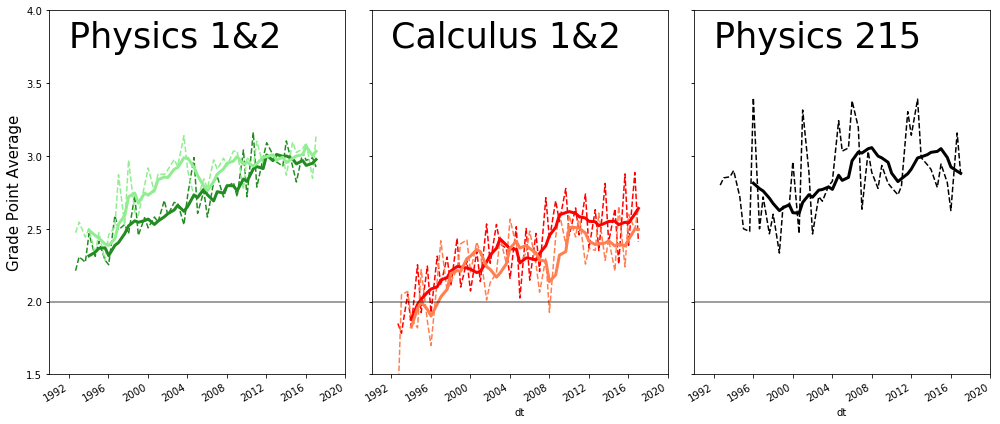

In [92]:
fig, (ax, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 6), sharex=True, sharey=True)
# df[avgs].plot(ax=ax, linestyle='--', color=['forestgreen', 'lightgreen', 'red', 'coral'])

ax.plot(df['phys1_avg'].index, df['phys1_avg'].values, linestyle='--', color='forestgreen', label=None)
ax.plot(df['phys2_avg'].index, df['phys2_avg'].values, linestyle='--', color='lightgreen', label=None)
ax2.plot(df['calc1_avg'].index, df['calc1_avg'].values, linestyle='--', color='red', label=None)
ax2.plot(df['calc2_avg'].index, df['calc2_avg'].values, linestyle='--', color='coral', label=None)
ax3.plot(df['phys215_avg'].index, df['phys215_avg'].values, linestyle='--', color='black', label=None)

df['phys1_avg'].rolling(window=4).mean().plot( linewidth=3, ax=ax, color=['forestgreen'],)
df['phys2_avg'].rolling(window=4).mean().plot( linewidth=3, ax=ax, color=[ 'lightgreen',],)
df['calc1_avg'].rolling(window=4).mean().plot( linewidth=3, ax=ax2, color=[ 'red', ],)
df['calc2_avg'].rolling(window=4).mean().plot( linewidth=3, ax=ax2, color=[ 'coral',],)
df['phys215_avg'].rolling(window=8).mean().plot( linewidth=3, ax=ax3, color=[ 'black'],)

x1 = pd.to_datetime('1990')
x2 = pd.to_datetime('2020')
ax.plot([x1, x2], [2, 2], alpha=0.5, color='black')
ax2.plot([x1, x2], [2, 2], alpha=0.5, color='black')
ax3.plot([x1, x2], [2, 2], alpha=0.5, color='black')

# ax.legend(['Physics 1 AVG', 'Physics 2 AVG', 'Calculus 1 AVG', 'Calculus 2 AVG', 'Physics 215 AVG'], fontsize=15)

ax.set_xlim(x1, x2)
ax.set_ylim(1.5, 4)

ax.set_ylabel('Grade Point Average', fontsize=15)
ax.set_xlabel('')

ax.text(s='Physics 1&2', x=pd.to_datetime('1992'), y=3.75, fontsize=35)
ax2.text(s='Calculus 1&2', x=pd.to_datetime('1992'), y=3.75, fontsize=35)
ax3.text(s='Physics 215', x=pd.to_datetime('1992'), y=3.75, fontsize=35)

plt.tight_layout()